In [ ]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
def GS_Python(img, maxIter):
    
    height, width = img.shape
    
    # --- Assumptions
    measuredAmplitudeSpace    = np.sqrt(img)
    measuredAmplitudeFourier  = np.ones((height, width))
    
    # --- Starting point
    currentPhaseSpace         = np.random.rand(height, width)
    
    # --- Initialization
    currentPhaseFourier       = np.ones((height, width))

    currentSpace = measuredAmplitudeSpace * np.exp(currentPhaseSpace * 1j)

    for iter in range(maxIter):
        # --- Enforce measured amplitude constraint in the Fourier domain
        currentFourier            = np.fft.fft2(currentSpace)
        currentPhaseFourier       = np.angle(currentFourier)
        currentFourier            = measuredAmplitudeFourier * np.exp(1j * currentPhaseFourier)

        # --- Enforce measured amplitude constraint in the spatial domain
        currentSpace              = np.fft.ifft2(currentFourier)
        currentPhaseSpace         = np.angle(currentSpace)
        currentSpace              = measuredAmplitudeSpace * np.exp(1j * currentPhaseSpace)

    return currentPhaseFourier

Main program.

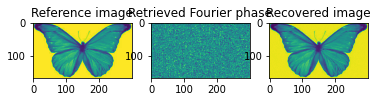

In [ ]:
#filename = 'images.jpg'
filename = 'butterfly.jfif'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = img.astype(float)

# --- Maximum number of iterations
maxIters = 1000

retrievedPhase = GS_Python(img, maxIters)

plt.figure(1)

# --- Reference image
plt.subplot(131)
plt.imshow(img)
plt.title('Reference image')

# --- Retrieved Fourier phase
plt.subplot(132)
plt.imshow(retrievedPhase)
plt.title('Retrieved Fourier phase')

plt.subplot(133)
recoveredImage = np.fft.ifft2(np.exp(retrievedPhase * 1j))
plt.imshow(np.absolute(recoveredImage)**2)
plt.title('Recovered image')

plt.show()